<a href="https://colab.research.google.com/github/AmiraOsamaMohamed/OS2Project/blob/main/Finalllllllof_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json


In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
import cv2


In [3]:
##read image folder##
DIR=r'/content/images'

In [4]:
##read train and test file##
train=pd.read_csv(r"/content/drive/MyDrive/train.csv")
# test=pd.read_csv(r"/content/test.csv")

In [5]:
##prepering data##
class_names=train.loc[:,'healthy':].columns
print(class_names)
number=0
train['label']=0
for i in class_names:
    train['label']=train['label'] + train[i] * number
    number=number+1
train.head()   

Index(['healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')


,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0


In [6]:
def get_label_img(img):
    if search("Train",img):
        img=img.split('.')[0]
        label=train.loc[train['image_id']==img]['label']
        return label

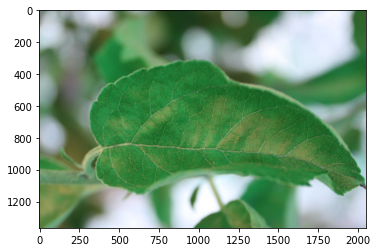

In [7]:
####data(images) preprocessing########
Train_DIR=r'/content/drive/MyDrive/'
Categories=['healthy','multiple_disease','rust','scab']
for j in Categories:
    path=os.path.join(Train_DIR,j)
    for img in os.listdir(path):
        old_image=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(old_image)
        plt.show()
        break
    break

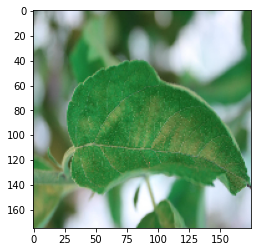

In [8]:
IMG_SIZE=175
new_image=cv2.resize(old_image,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_image)
plt.show()

In [9]:
import os
import cv2
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

from keras.layers.normalization import batch_normalization

In [10]:
import numpy as np 
import pandas as pd
import os
from os import listdir
import matplotlib as plt
from matplotlib.image import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# fpath = "/content/drive/MyDrive/images_Train"
# random_seed = 42

In [10]:
train=pd.read_csv(r"/content/drive/MyDrive/train.csv")
class_names=train.loc[:,'healthy':].columns
print(class_names)
number=0
train['label']=0
for i in class_names:
    train['label']=train['label'] + train[i] * number
    number=number+1
train.head() 
categories=train.iloc[:1538,5].values  


Index(['healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')


In [11]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index in os.listdir('/content/drive/MyDrive/images_Train'):  
        img=cv2.imread(os.path.join('/content/drive/MyDrive/images_Train',index))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_array = Image.fromarray(img, 'RGB') 
        #resize image to 175*175 
        resized_img = img_array.resize((224,224))
        img_lst.append(np.array(resized_img))
        labels.append(index)
    return img_lst, labels
images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))


No. of images loaded =  1538 
No. of labels loaded =  1538
<class 'list'> <class 'list'>


In [12]:
images =np.array(images)
labels =np.array(labels)
print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))
####first num for num of images ...and second,third num for size of each img...fourth num for dimention



Images shape =  (1538, 224, 224, 3) 
Labels shape =  (1538,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [13]:
#######spliting data########
X_train=images
Y_train=categories
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state=42)
from keras.utils import to_categorical
y_val = to_categorical(y_val, 4)
y_train = to_categorical(y_train, 4)
print(X_train.shape, x_train.shape, x_val.shape)

(1538, 224, 224, 3) (1230, 224, 224, 3) (308, 224, 224, 3)


In [14]:
#####scale of each feature###
X_train_scaled = x_train/255
X_test_scaled = x_val/255
print(X_train_scaled.shape)
print(X_test_scaled.shape)
# print(X_train_scaled)
# print(y_train)

(1230, 224, 224, 3)
(308, 224, 224, 3)


In [1]:
import numpy as np  
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout 
import os
from os import listdir
import matplotlib as plt
from matplotlib.image import imread
import tensorflow as tf
##############Build Neural network#############
ann = tf.keras.Sequential()
##input##
ann.add(tf.keras.layers.Flatten(input_shape=(224,224,3)))
##hidden1##
ann.add(tf.keras.layers.Dense(units=1000, activation='relu'))
##hidden2##
ann.add(tf.keras.layers.Dense(units=1000, activation='relu'))
##hidden3##
ann.add(tf.keras.layers.Dense(units=1000, activation='relu'))
##hidden4##
ann.add(tf.keras.layers.Dense(units=1000, activation='relu'))
##output##
ann.add(tf.keras.layers.Dense(units=4, activation='softmax'))
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 1000)              150529000 
                                                                 
 dense_1 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_2 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_3 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_4 (Dense)             (None, 4)                 4004      
                                                                 
Total params: 153,536,004
Trainable params: 153,536,004


In [15]:
##################compiler model#####
ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:

checkpoint = keras.callbacks.ModelCheckpoint(filepath="weight.h5",verbose=1,save_best_only=True)
history=ann.fit (X_train_scaled, y_train , epochs=5 ,validation_data=(X_test_scaled,y_val),callbacks=[checkpoint], verbose=1 )


Epoch 1/5
39/39 [==============================] - ETA: 0s - loss: 31.9264 - accuracy: 0.2992
Epoch 1: val_loss improved from inf to 1.53065, saving model to weight.h5
39/39 [==============================] - 56s 1s/step - loss: 31.9264 - accuracy: 0.2992 - val_loss: 1.5307 - val_accuracy: 0.3214
Epoch 2/5
39/39 [==============================] - ETA: 0s - loss: 1.3242 - accuracy: 0.3203
Epoch 2: val_loss improved from 1.53065 to 1.36516, saving model to weight.h5
39/39 [==============================] - 53s 1s/step - loss: 1.3242 - accuracy: 0.3203 - val_loss: 1.3652 - val_accuracy: 0.3247
Epoch 3/5
39/39 [==============================] - ETA: 0s - loss: 1.2693 - accuracy: 0.3341
Epoch 3: val_loss improved from 1.36516 to 1.23662, saving model to weight.h5
39/39 [==============================] - 54s 1s/step - loss: 1.2693 - accuracy: 0.3341 - val_loss: 1.2366 - val_accuracy: 0.3247
Epoch 4/5
39/39 [==============================] - ETA: 0s - loss: 1.2549 - accuracy: 0.3496
Epoch 4: 

In [17]:
print(type(X_train_scaled))
print(type(y_train))
print(type(x_val))
print(type(y_val))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


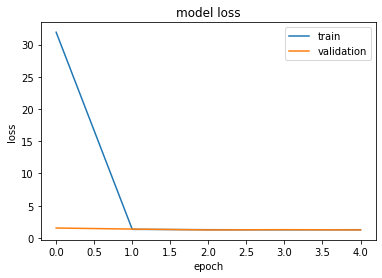

In [18]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')
plt.show()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


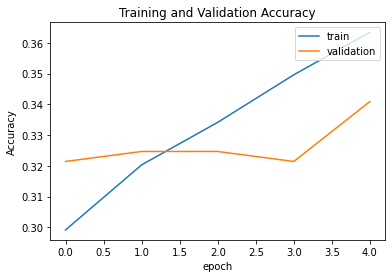

In [19]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')
plt.show()

In [20]:
# ######evaluate##check validation##
score, acc = ann.evaluate(X_test_scaled, y_val)
print('Test Loss =', score)
print('Test Accuracy =', acc)

10/10 [==============================] - 3s 299ms/step - loss: 1.2360 - accuracy: 0.3409
Test Loss = 1.2359777688980103
Test Accuracy = 0.34090909361839294


In [ ]:
# ##save model##
# ann.save('/content/drive/MyDrive/model.csv')
# c=load_model('/content/drive/MyDrive/model.csv')
# c.load_weights('weight.h5.csv')

1/1 [==============================] - 0s 370ms/step
3


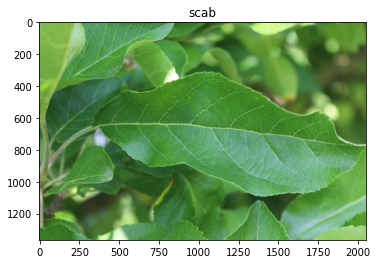

In [21]:
##predict##
test_image=r'/content/drive/MyDrive/test/Test_1026.jpg'
image_result=Image.open(test_image)
from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=ann.predict(test_image)
print(np.argmax(result))
Categories=['healthy','multiple_disease','rust','scab']
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()

In [ ]:
!kaggle competitions download -c plant-pathology-2020-fgvc7
from zipfile import ZipFile
file_name = "/content/plant-pathology-2020-fgvc7.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

100% 776M/779M [00:05<00:00, 156MB/s]
100% 779M/779M [00:05<00:00, 153MB/s]
Done
